In [ ]:
import time

import numpy as np
# from modules.training.ts_modeling import pcc_loss
import tensorflow as tf

from modules.training.phase_manager import TrainingPhaseManager
from modules.training.ts_modeling import pcc_loss

In [ ]:
pm = TrainingPhaseManager()

In [ ]:
# Sample input data
y_true = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_pred = tf.constant([1.1, 1.9, 3.0], dtype=tf.float32)

# Sample weights dictionary
train_weight_dict = {1.0: 0.5, 2.0: 1.0, 3.0: 1.5}

loss = pcc_loss(y_true, y_pred, pm, train_weight_dict=train_weight_dict)
print(f"Computed Loss: {loss.numpy()}")

In [ ]:
# Generate 1000 synthetic samples
np.random.seed(42)
n_samples = 4096
y_true = tf.constant(np.random.uniform(0, 5, n_samples), dtype=tf.float32)
y_pred = y_true + tf.random.normal(shape=[n_samples], mean=0.0, stddev=0.1)

# Generate a sample train_weight_dict
unique_values = np.unique(y_true.numpy())
train_weight_dict = {val: np.random.uniform(0.5, 2.0) for val in unique_values}

# Time the pcc_loss computation
start_time = time.time()

# Compute the loss
loss = pcc_loss(y_true, y_pred, pm, train_weight_dict=train_weight_dict)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Computed Loss: {loss.numpy()}")
print(f"Elapsed Time: {elapsed_time:.6f} seconds")


In [ ]:
# Sample input data
y_true = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_pred = tf.constant([1.1, 1.9, 3.0], dtype=tf.float32)

# Sample weights dictionary
train_weight_dict = {1.0: 0.5, 2.0: 1.0, 3.0: 1.5}

loss = pcc_loss(y_true, y_pred, val_weight_dict=train_weight_dict)
print(f"Computed Loss: {loss.numpy()}")

In [ ]:
# Sample input data
y_true = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_pred = tf.constant([3, 1.9, 1.1], dtype=tf.float32)

# Sample weights dictionary
train_weight_dict = {1.0: 0.5, 2.0: 1.0, 3.0: 1.5}

loss = pcc_loss(y_true, y_pred, train_weight_dict=train_weight_dict)
print(f"Computed Loss: {loss.numpy()}")

In [ ]:
# Sample input data
y_true = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_pred = tf.constant([1.1, 1.9, 3.0], dtype=tf.float32)

# Sample weights dictionary
train_weight_dict = {1.0: 1, 2.0: 1, 3.0: 1}

loss = pcc_loss(y_true, y_pred, train_weight_dict=train_weight_dict)
print(f"Computed Loss: {loss.numpy()}")

In [ ]:
# Sample input data
y_true = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_pred = tf.constant([1.1, 1.9, 3.0], dtype=tf.float32)

# Sample weights dictionary
train_weight_dict = {1.0: 1, 2.0: 1, 3.0: 1}

loss = pcc_loss(y_true, y_pred, val_weight_dict=train_weight_dict)
print(f"Computed Loss: {loss.numpy()}")

In [ ]:
# Sample input data
y_true = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_pred = tf.constant([1.1, 1.9, 3.0], dtype=tf.float32)

# Sample weights dictionary
train_weight_dict = {1.0: 10, 2.0: 100, 3.0: 1000}

loss = pcc_loss(y_true, y_pred, train_weight_dict=train_weight_dict, val_weight_dict=train_weight_dict)
print(f"Computed Loss: {loss.numpy()}")

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from modules.training.ts_modeling import pcc_loss
from modules.training.phase_manager import TrainingPhaseManager, IsTraining

In [ ]:

# Initialize the phase manager
phase_manager = TrainingPhaseManager()


In [ ]:

# Generate synthetic data
np.random.seed(42)
X_train = np.random.rand(2, 10)
y_train = np.random.randint(0, 2, size=(2, 1))  # Use 0 and 1 to match the keys in the weight dict
X_val = np.random.rand(2, 10)
y_val = np.random.randint(0, 2, size=(2, 1))  # Use 0 and 1 to match the keys in the weight dict

# cast to tf 32
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
X_val = tf.constant(X_val, dtype=tf.float32)
y_val = tf.constant(y_val, dtype=tf.float32)
print(y_train)
print(y_val)

# Define simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss=lambda y_true, y_pred: pcc_loss(
    y_true, y_pred, phase_manager,
    train_weight_dict={0: 2.0, 1: 0.5},
    val_weight_dict={0: 0.8, 1: 0.2}
))

In [ ]:
# Train the model with validation data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=1, verbose=1,
                    callbacks=[IsTraining(phase_manager)])


In [ ]:
model.evaluate(X_val, y_val)

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow_addons.optimizers import AdamW

from modules.training.smooth_early_stopping import SmoothEarlyStopping, find_optimal_epoch_by_smoothing
from modules.training.ts_modeling import (
    create_mlp,
    plot_confusion_matrix,
    create_metrics_table,
)

print(f"Current Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Current Time: 2024-12-19 14:55:40


C:\Users\the_3\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\the_3\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If 

Epoch 1/50
32/32 [==============================] - 3s 23ms/step - loss: 1.0059 - forecast_head_loss: 1.0059 - dropout_17_accuracy: 0.0190 - forecast_head_accuracy: 0.6150 - val_loss: 0.7554 - val_forecast_head_loss: 0.7554 - val_dropout_17_accuracy: 0.0400 - val_forecast_head_accuracy: 0.8950 - lr: 0.0010
Epoch 2/50
32/32 [==============================] - 1s 17ms/step - loss: 0.4253 - forecast_head_loss: 0.4253 - dropout_17_accuracy: 0.0170 - forecast_head_accuracy: 0.8190 - val_loss: 0.5208 - val_forecast_head_loss: 0.5208 - val_dropout_17_accuracy: 0.0300 - val_forecast_head_accuracy: 0.9450 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - 1s 17ms/step - loss: 0.3414 - forecast_head_loss: 0.3414 - dropout_17_accuracy: 0.0370 - forecast_head_accuracy: 0.8640 - val_loss: 0.3620 - val_forecast_head_loss: 0.3620 - val_dropout_17_accuracy: 0.0150 - val_forecast_head_accuracy: 0.9600 - lr: 0.0010
Epoch 4/50
32/32 [==============================] - 1s 17ms/step - loss: 0.3

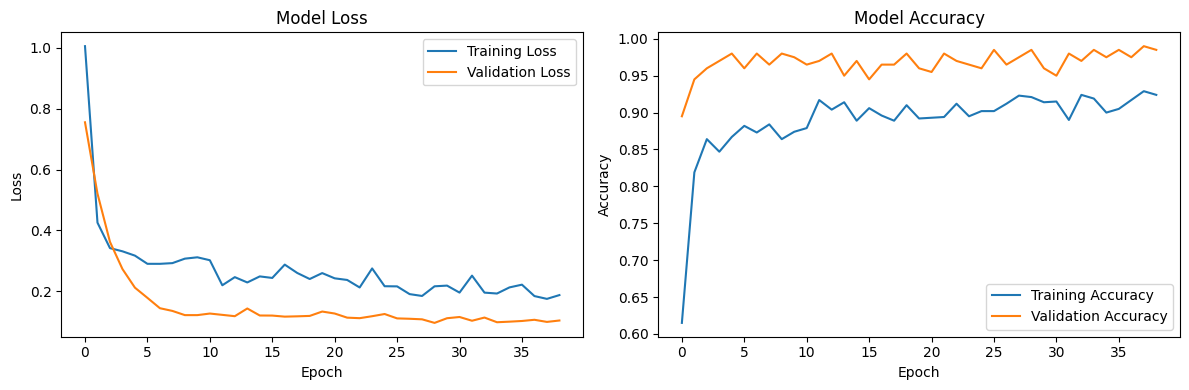

7/7 [==============================] - 0s 2ms/step

Final Training Accuracy: 0.9890
Final Test Accuracy: 0.9850


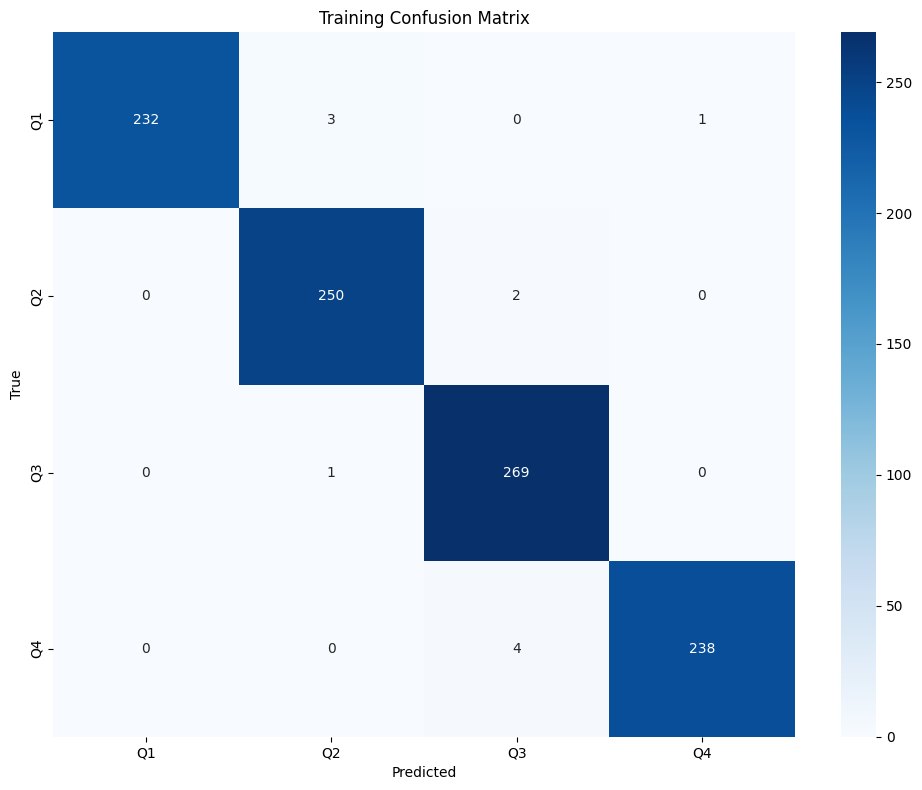

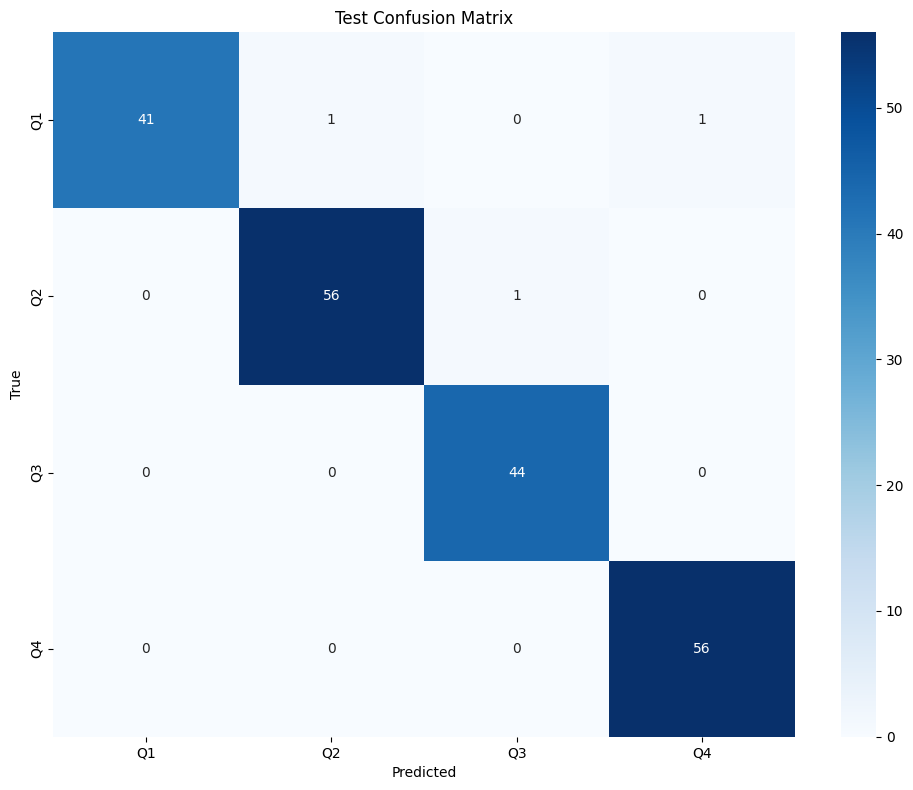

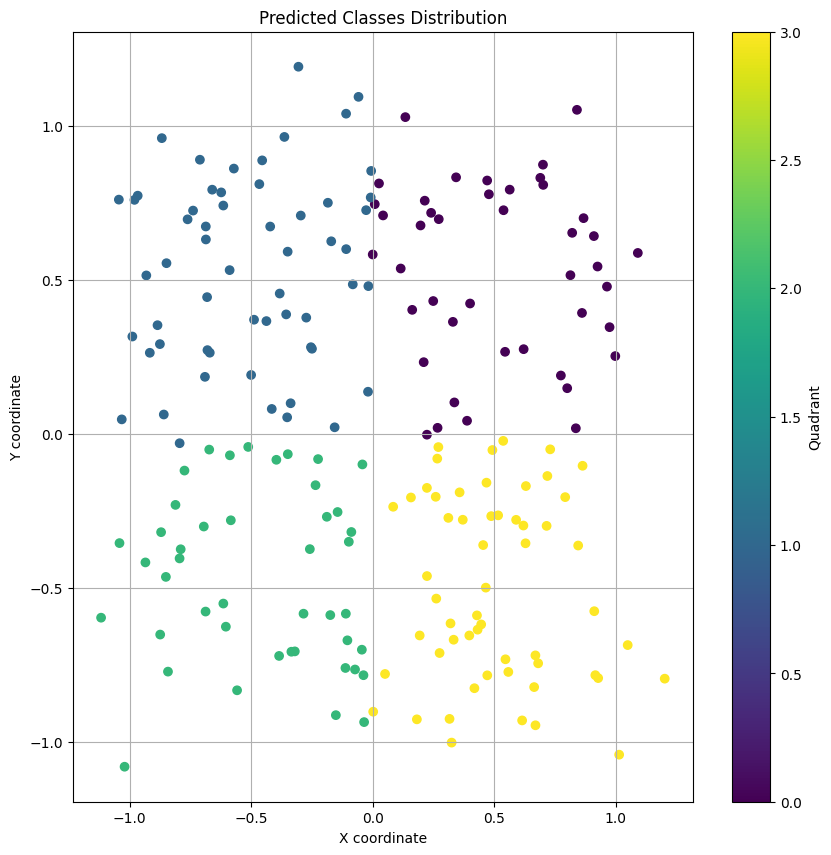


Classification Report:
              precision    recall  f1-score   support

          Q1       0.95      1.00      0.98        41
          Q2       0.98      0.98      0.98        57
          Q3       1.00      0.98      0.99        45
          Q4       1.00      0.98      0.99        57

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [7]:

def generate_quadrant_data(n_samples=1000, noise=0.1):
    """Generate synthetic data with 4 classes based on quadrants"""
    X = np.random.uniform(-1, 1, (n_samples, 2))

    # Add some noise
    X += np.random.normal(0, noise, X.shape)

    # Assign classes based on quadrants (0: top-right, 1: top-left, 2: bottom-left, 3: bottom-right)
    y = np.zeros(n_samples)
    y[(X[:, 0] < 0) & (X[:, 1] > 0)] = 1  # top-left
    y[(X[:, 0] < 0) & (X[:, 1] < 0)] = 2  # bottom-left
    y[(X[:, 0] > 0) & (X[:, 1] < 0)] = 3  # bottom-right

    # Convert to one-hot encoding
    y_onehot = np.zeros((n_samples, 4))
    y_onehot[np.arange(n_samples), y.astype(int)] = 1

    return X, y_onehot

# Generate synthetic data
X_train, y_train = generate_quadrant_data(n_samples=1000)
X_test, y_test = generate_quadrant_data(n_samples=200)

# Model parameters
n_features = 2  # x and y coordinates
output_dim = 4  # 4 quadrants
hiddens = [64, 32]  # Simplified architecture
learning_rate = 0.001
batch_size = 32
epochs = 50

# Create model
model = create_mlp(
    input_dim=n_features,
    hiddens=hiddens,
    embed_dim=32,
    output_dim=output_dim,
    dropout=0.2,
    activation=None,
    sam_rho=1e-2,
    output_activation='softmax'
)

model.compile(
    optimizer=AdamW(learning_rate=learning_rate, weight_decay=1e-6),
    loss={'forecast_head':'categorical_crossentropy'},
    metrics=['accuracy']
)

# Callbacks
early_stopping = SmoothEarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[
        early_stopping,
        reduce_lr
    ],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['forecast_head_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_forecast_head_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Get predictions
y_train_pred = model.predict(X_train)[1]
y_test_pred = model.predict(X_test)[1]

# Convert predictions to class labels
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_true_classes, y_train_pred_classes)
test_accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)

print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrices
class_names = ['Q1', 'Q2', 'Q3', 'Q4']

train_cm_fig = plot_confusion_matrix(
    y_train_pred_classes,
    y_train_true_classes,
    class_names=class_names,
    title="Training Confusion Matrix"
)
plt.show()

test_cm_fig = plot_confusion_matrix(
    y_test_pred_classes,
    y_test_true_classes,
    class_names=class_names,
    title="Test Confusion Matrix"
)
plt.show()

# Plot data distribution
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_classes, cmap='viridis')
plt.title('Predicted Classes Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(label='Quadrant')
plt.grid(True)
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))


Epoch 1/50
32/32 [==============================] - 4s 25ms/step - loss: 0.7233 - forecast_head_loss: 0.7233 - dropout_20_accuracy: 0.0020 - forecast_head_accuracy: 0.6760 - val_loss: 0.7291 - val_forecast_head_loss: 0.7291 - val_dropout_20_accuracy: 0.0000e+00 - val_forecast_head_accuracy: 0.8650 - lr: 0.0010
Epoch 2/50
32/32 [==============================] - 1s 21ms/step - loss: 0.4447 - forecast_head_loss: 0.4447 - dropout_20_accuracy: 0.0040 - forecast_head_accuracy: 0.8360 - val_loss: 0.5293 - val_forecast_head_loss: 0.5293 - val_dropout_20_accuracy: 0.0000e+00 - val_forecast_head_accuracy: 0.9150 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - 1s 25ms/step - loss: 0.4166 - forecast_head_loss: 0.4166 - dropout_20_accuracy: 0.0010 - forecast_head_accuracy: 0.8470 - val_loss: 0.3874 - val_forecast_head_loss: 0.3874 - val_dropout_20_accuracy: 0.0000e+00 - val_forecast_head_accuracy: 0.9600 - lr: 0.0010
Epoch 4/50
32/32 [==============================] - 1s 26ms/step

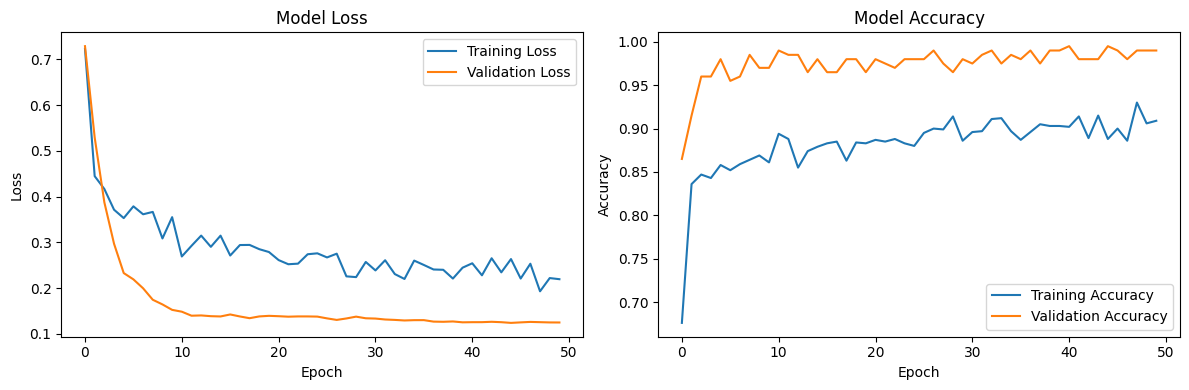

7/7 [==============================] - 0s 5ms/step

Final Training Accuracy: 0.9920
Final Test Accuracy: 0.9900


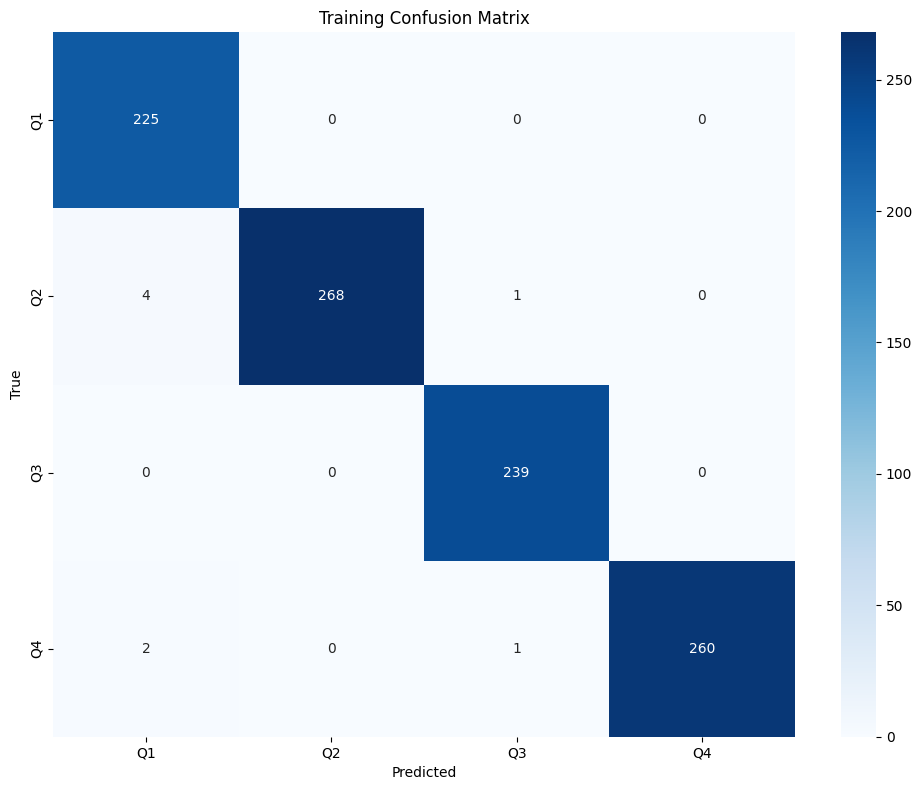

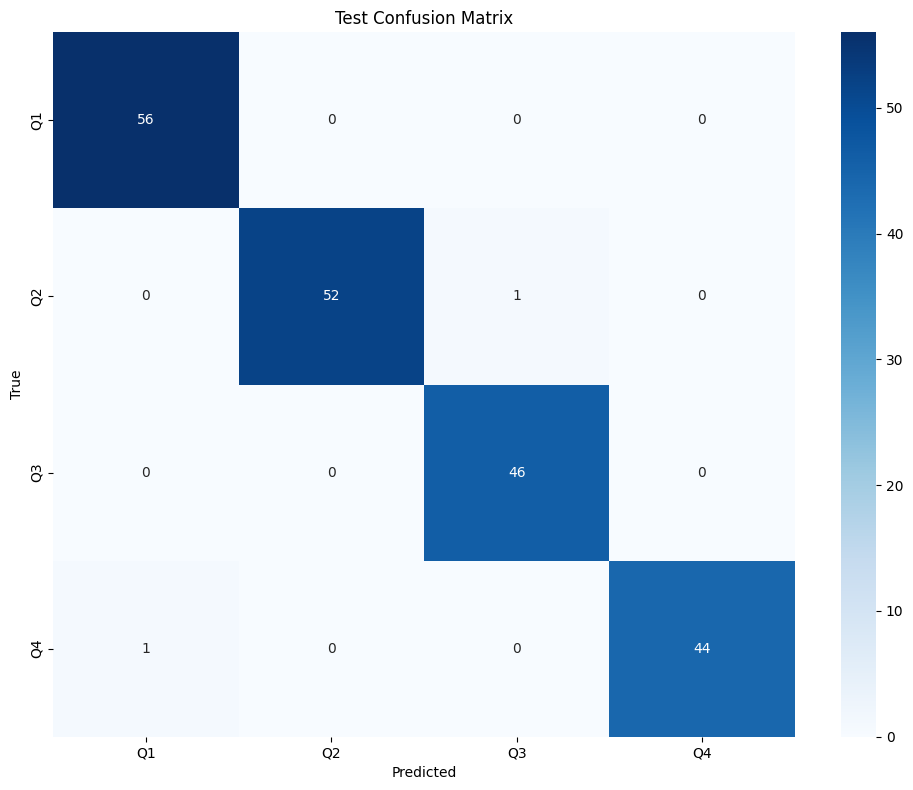

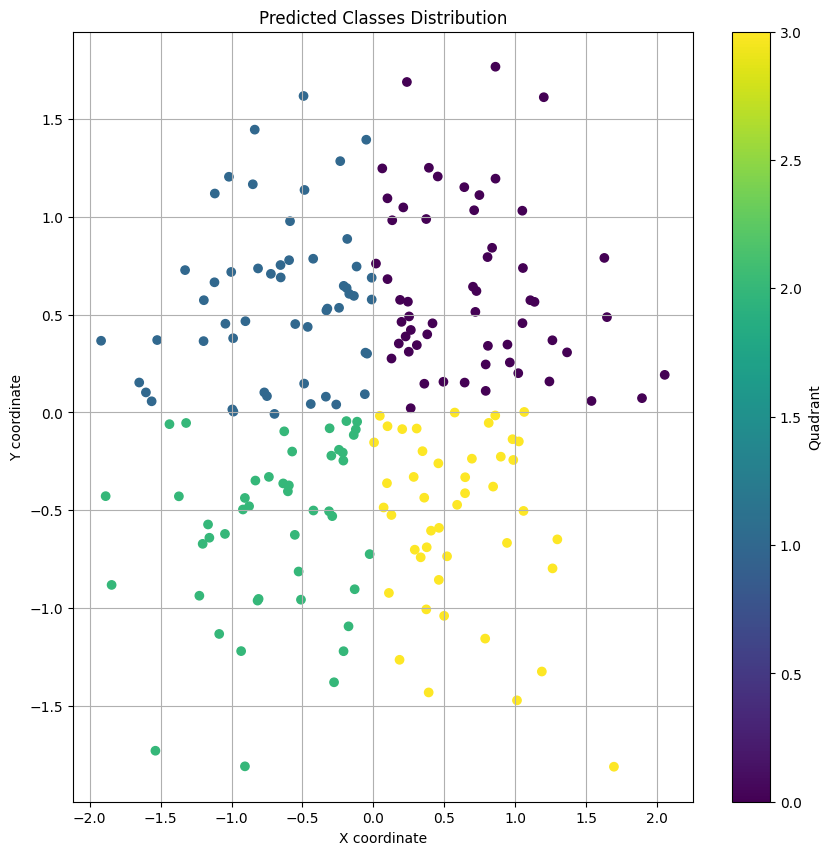


Classification Report:
              precision    recall  f1-score   support

          Q1       1.00      0.98      0.99        57
          Q2       0.98      1.00      0.99        52
          Q3       1.00      0.98      0.99        47
          Q4       0.98      1.00      0.99        44

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [8]:

def generate_quadrant_data(n_samples=1000, noise=0.5):
    """Generate synthetic data with 4 classes based on quadrants"""
    X = np.random.uniform(-1, 1, (n_samples, 2))

    # Add some noise
    X += np.random.normal(0, noise, X.shape)

    # Assign classes based on quadrants (0: top-right, 1: top-left, 2: bottom-left, 3: bottom-right)
    y = np.zeros(n_samples)
    y[(X[:, 0] < 0) & (X[:, 1] > 0)] = 1  # top-left
    y[(X[:, 0] < 0) & (X[:, 1] < 0)] = 2  # bottom-left
    y[(X[:, 0] > 0) & (X[:, 1] < 0)] = 3  # bottom-right

    # Convert to one-hot encoding
    y_onehot = np.zeros((n_samples, 4))
    y_onehot[np.arange(n_samples), y.astype(int)] = 1

    return X, y_onehot

# Generate synthetic data
X_train, y_train = generate_quadrant_data(n_samples=1000)
X_test, y_test = generate_quadrant_data(n_samples=200)

# Model parameters
n_features = 2  # x and y coordinates
output_dim = 4  # 4 quadrants
hiddens = [64, 32]  # Simplified architecture
learning_rate = 0.001
batch_size = 32
epochs = 50

# Create model
model = create_mlp(
    input_dim=n_features,
    hiddens=hiddens,
    embed_dim=32,
    output_dim=output_dim,
    dropout=0.2,
    activation=None,
    sam_rho=1e-2,
    output_activation='softmax'
)

model.compile(
    optimizer=AdamW(learning_rate=learning_rate, weight_decay=1e-6),
    loss={'forecast_head':'categorical_crossentropy'},
    metrics=['accuracy']
)

# Callbacks
early_stopping = SmoothEarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[
        early_stopping,
        reduce_lr
    ],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['forecast_head_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_forecast_head_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Get predictions
y_train_pred = model.predict(X_train)[1]
y_test_pred = model.predict(X_test)[1]

# Convert predictions to class labels
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_true_classes, y_train_pred_classes)
test_accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)

print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrices
class_names = ['Q1', 'Q2', 'Q3', 'Q4']

train_cm_fig = plot_confusion_matrix(
    y_train_pred_classes,
    y_train_true_classes,
    class_names=class_names,
    title="Training Confusion Matrix"
)
plt.show()

test_cm_fig = plot_confusion_matrix(
    y_test_pred_classes,
    y_test_true_classes,
    class_names=class_names,
    title="Test Confusion Matrix"
)
plt.show()

# Plot data distribution
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_classes, cmap='viridis')
plt.title('Predicted Classes Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(label='Quadrant')
plt.grid(True)
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))


Epoch 1/50
32/32 [==============================] - 4s 40ms/step - loss: 1.6609 - forecast_head_loss: 1.6609 - dropout_23_accuracy: 0.0260 - forecast_head_accuracy: 0.4120 - val_loss: 0.9539 - val_forecast_head_loss: 0.9539 - val_dropout_23_accuracy: 0.0250 - val_forecast_head_accuracy: 0.6050 - lr: 0.0010
Epoch 2/50
32/32 [==============================] - 1s 34ms/step - loss: 1.0517 - forecast_head_loss: 1.0517 - dropout_23_accuracy: 0.0370 - forecast_head_accuracy: 0.5750 - val_loss: 0.7461 - val_forecast_head_loss: 0.7461 - val_dropout_23_accuracy: 0.0850 - val_forecast_head_accuracy: 0.7800 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - 1s 27ms/step - loss: 0.8487 - forecast_head_loss: 0.8487 - dropout_23_accuracy: 0.0520 - forecast_head_accuracy: 0.6100 - val_loss: 0.6114 - val_forecast_head_loss: 0.6114 - val_dropout_23_accuracy: 0.0950 - val_forecast_head_accuracy: 0.7950 - lr: 0.0010
Epoch 4/50
32/32 [==============================] - 1s 26ms/step - loss: 0.7

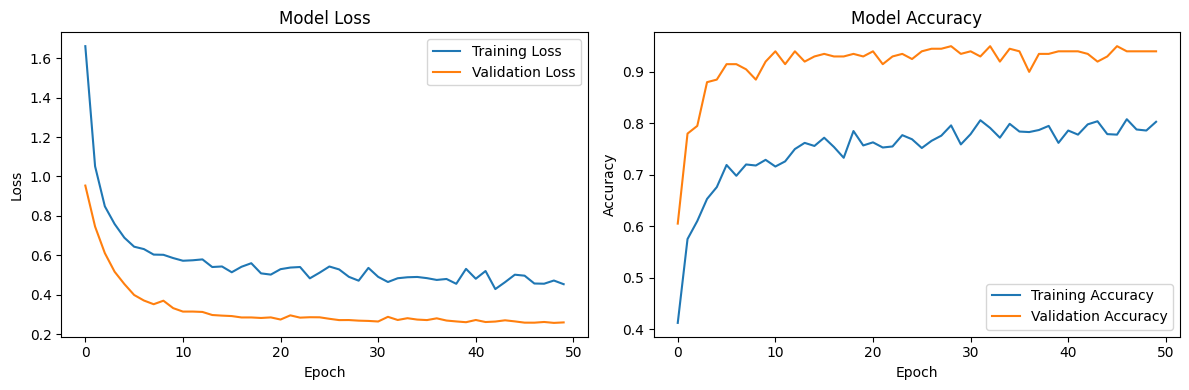

7/7 [==============================] - 0s 5ms/step

Final Training Accuracy: 0.9320
Final Test Accuracy: 0.9400


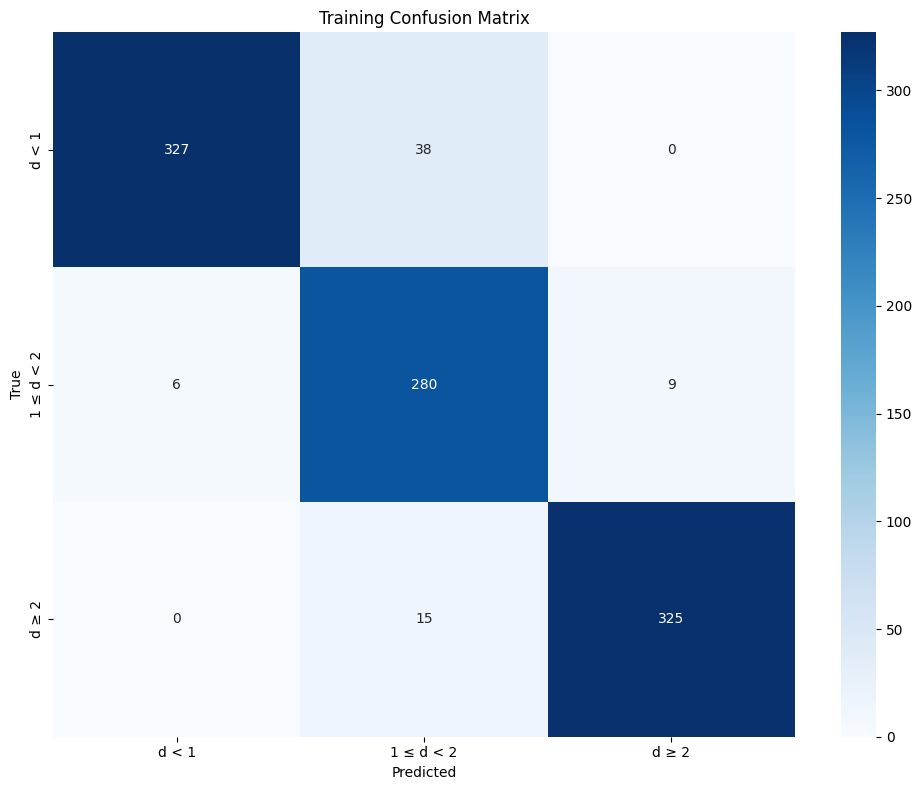

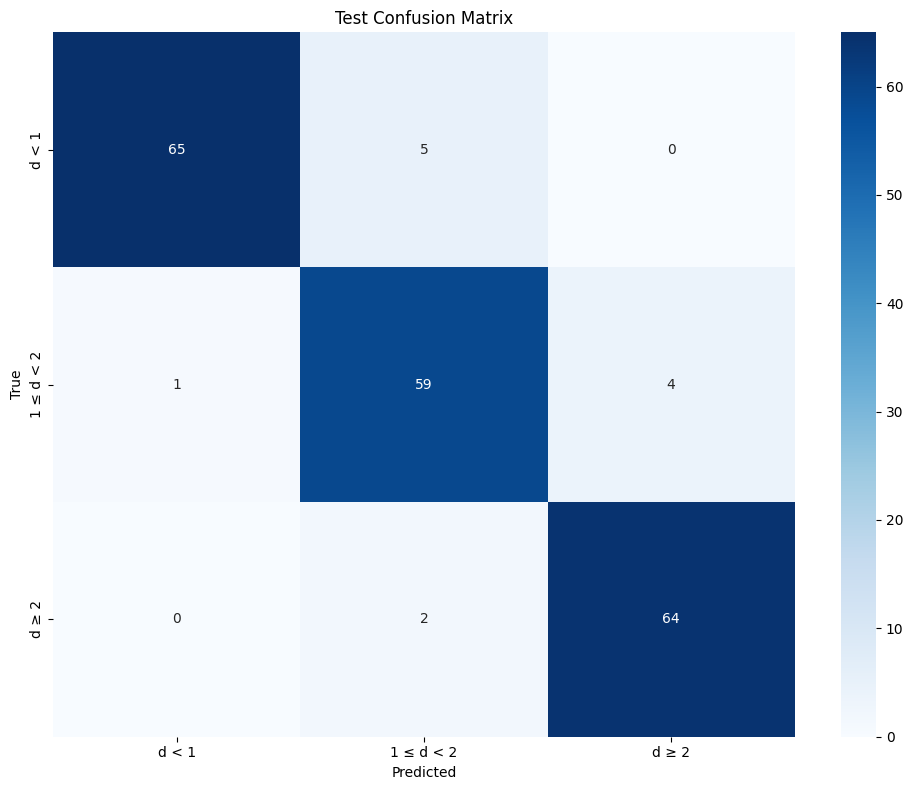

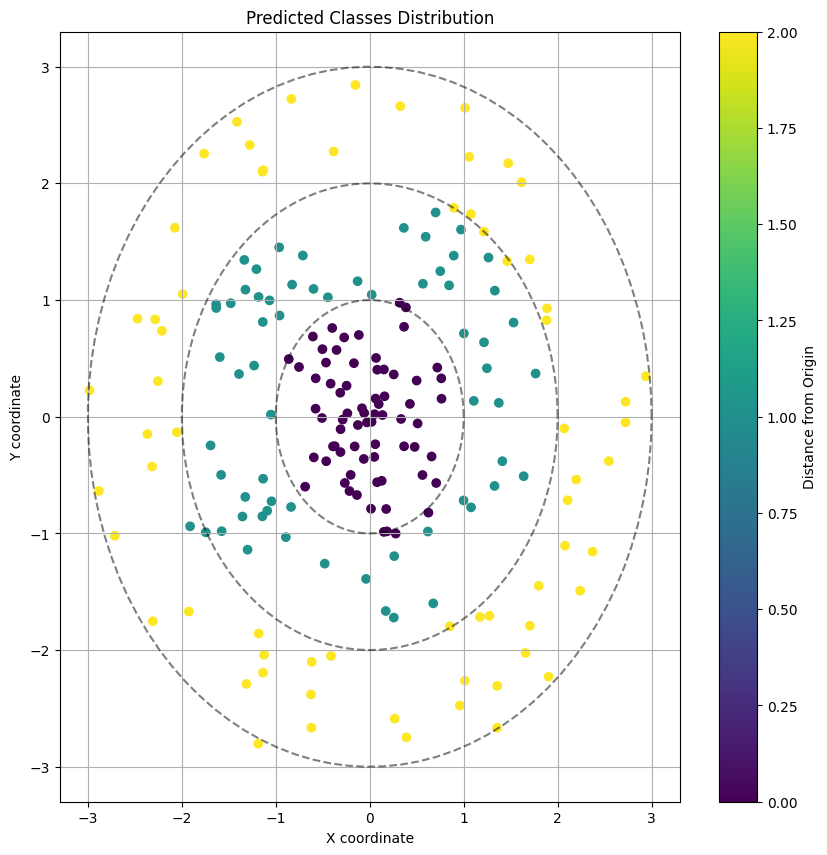


Classification Report:
              precision    recall  f1-score   support

       d < 1       0.93      0.98      0.96        66
   1 ≤ d < 2       0.92      0.89      0.91        66
       d ≥ 2       0.97      0.94      0.96        68

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [9]:
def generate_distance_data(n_samples=1000, noise=0.1):
    """Generate synthetic data with 3 classes based on distance from origin"""
    # Initialize empty arrays
    X = np.zeros((n_samples, 2))
    y = np.zeros(n_samples)
    
    # Split samples evenly between classes
    samples_per_class = n_samples // 3
    
    # Class 0: distance < 1
    n0 = samples_per_class
    r0 = np.random.uniform(0, 1, n0)
    theta0 = np.random.uniform(0, 2*np.pi, n0)
    X[:n0, 0] = r0 * np.cos(theta0)
    X[:n0, 1] = r0 * np.sin(theta0)
    y[:n0] = 0
    
    # Class 1: 1 <= distance < 2
    n1 = samples_per_class
    r1 = np.random.uniform(1, 2, n1)
    theta1 = np.random.uniform(0, 2*np.pi, n1)
    X[n0:n0+n1, 0] = r1 * np.cos(theta1)
    X[n0:n0+n1, 1] = r1 * np.sin(theta1)
    y[n0:n0+n1] = 1
    
    # Class 2: 2 <= distance <= 3
    n2 = n_samples - n0 - n1
    r2 = np.random.uniform(2, 3, n2)
    theta2 = np.random.uniform(0, 2*np.pi, n2)
    X[n0+n1:, 0] = r2 * np.cos(theta2)
    X[n0+n1:, 1] = r2 * np.sin(theta2)
    y[n0+n1:] = 2
    
    # Add small noise
    X += np.random.normal(0, noise, X.shape)
    
    # Convert to one-hot encoding
    y_onehot = np.zeros((n_samples, 3))
    y_onehot[np.arange(n_samples), y.astype(int)] = 1

    return X, y_onehot

# Generate synthetic data
X_train, y_train = generate_distance_data(n_samples=1000)
X_test, y_test = generate_distance_data(n_samples=200)

# Model parameters
n_features = 2  # x and y coordinates
output_dim = 3  # 3 distance-based classes
hiddens = [64, 32]  # Simplified architecture
learning_rate = 0.001
batch_size = 32
epochs = 50

# Create model
model = create_mlp(
    input_dim=n_features,
    hiddens=hiddens,
    embed_dim=32,
    output_dim=output_dim,
    dropout=0.2,
    activation=None,
    sam_rho=1e-2,
    output_activation='softmax'
)

model.compile(
    optimizer=AdamW(learning_rate=learning_rate, weight_decay=1e-6),
    loss={'forecast_head':'categorical_crossentropy'},
    metrics=['accuracy']
)

# Callbacks
early_stopping = SmoothEarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[
        early_stopping,
        reduce_lr
    ],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['forecast_head_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_forecast_head_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Get predictions
y_train_pred = model.predict(X_train)[1]
y_test_pred = model.predict(X_test)[1]

# Convert predictions to class labels
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_true_classes, y_train_pred_classes)
test_accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)

print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrices
class_names = ['d < 1', '1 ≤ d < 2', 'd ≥ 2']

train_cm_fig = plot_confusion_matrix(
    y_train_pred_classes,
    y_train_true_classes,
    class_names=class_names,
    title="Training Confusion Matrix"
)
plt.show()

test_cm_fig = plot_confusion_matrix(
    y_test_pred_classes,
    y_test_true_classes,
    class_names=class_names,
    title="Test Confusion Matrix"
)
plt.show()

# Plot data distribution
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_classes, cmap='viridis')
plt.title('Predicted Classes Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(label='Distance from Origin')
plt.grid(True)

# Add circles showing the class boundaries
theta = np.linspace(0, 2*np.pi, 100)
for r in [1, 2, 3]:
    plt.plot(r*np.cos(theta), r*np.sin(theta), 'k--', alpha=0.5)

plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))
